### Online Course Recommendation System 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [3]:
df = pd.read_excel("online_course_recommendation.xlsx")
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [4]:
df.shape

(100000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [6]:
df.describe()

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [7]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [8]:
df.isna().sum()  # to find null values in each column

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
df['course_name'].value_counts()

course_name
Networking and System Administration         5107
Cybersecurity for Professionals              5078
Advanced Machine Learning                    5063
Ethical Hacking Masterclass                  5062
Graphic Design with Canva                    5057
DevOps and Continuous Deployment             5037
Public Speaking Mastery                      5028
Mobile App Development with Swift            5024
Stock Market and Trading Strategies          5022
Data Visualization with Tableau              5010
AI for Business Leaders                      5007
Photography and Video Editing                4995
Project Management Fundamentals              4981
Blockchain and Decentralized Applications    4972
Fundamentals of Digital Marketing            4965
Personal Finance and Wealth Building         4933
Python for Beginners                         4931
Cloud Computing Essentials                   4926
Fitness and Nutrition Coaching               4903
Game Development with Unity           

In [11]:
df['difficulty_level'].value_counts()

difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64

In [12]:
df['course_name'].unique()

array(['Python for Beginners', 'Cybersecurity for Professionals',
       'DevOps and Continuous Deployment',
       'Project Management Fundamentals', 'Ethical Hacking Masterclass',
       'Networking and System Administration',
       'Personal Finance and Wealth Building',
       'Blockchain and Decentralized Applications',
       'Graphic Design with Canva', 'Fitness and Nutrition Coaching',
       'Public Speaking Mastery', 'Photography and Video Editing',
       'Advanced Machine Learning', 'Game Development with Unity',
       'Cloud Computing Essentials', 'Mobile App Development with Swift',
       'Data Visualization with Tableau',
       'Stock Market and Trading Strategies',
       'Fundamentals of Digital Marketing', 'AI for Business Leaders'],
      dtype=object)

In [13]:
df['course_name'].nunique()


20

In [14]:
df['instructor'].unique()

array(['Emma Harris', 'Alexander Young', 'Dr. Mia Walker',
       'Benjamin Lewis', 'Daniel White', 'Dr. John Smith',
       'Dr. Robert Davis', 'Liam Adams', 'Prof. Emily Johnson',
       'Isabella Scott', 'Charlotte King', 'Sarah Lee', 'Sophia Anderson',
       'James Clark', 'Ethan Hall', 'Olivia Taylor', 'Michael Brown',
       'William Thomas', 'Jessica Martinez', 'David Wilson'], dtype=object)

In [15]:
df['instructor'].nunique()

20

#### Data Encoding 

In [16]:
#ordinal categorical variables
df['difficulty_level'].replace(
    {
        'Beginner': 1,
        'Intermediate': 2,
        'Advanced': 3
    },
    inplace=True
)

In [17]:

df["certification_offered"].replace({"Yes": 1, "No": 0}, inplace=True)
df["study_material_available"].replace({"Yes": 1, "No": 0}, inplace=True)


In [18]:
#df.head()

### Data Visualizations

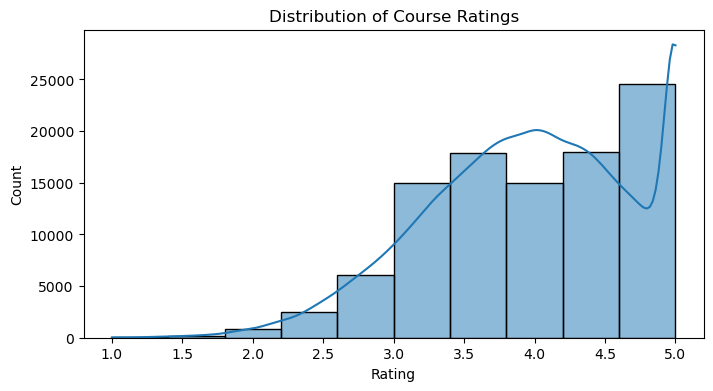

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(df["rating"], bins=10, kde=True)
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


##### Most courses are concentrated between ratings 3.5 and 5, indicating generally good quality

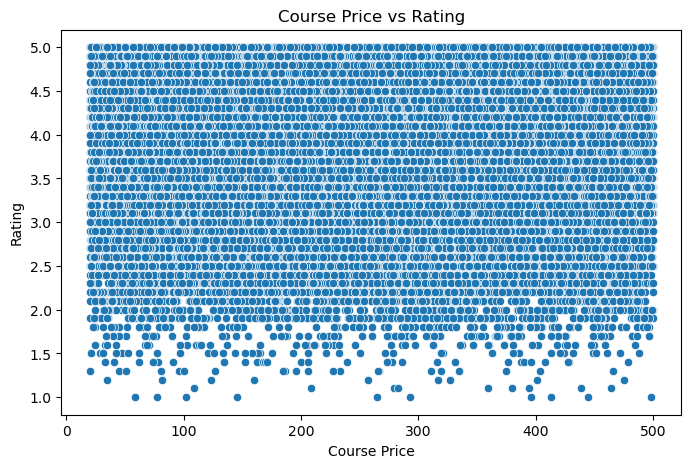

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="course_price",
    y="rating",
    data=df
)
plt.title("Course Price vs Rating")
plt.xlabel("Course Price")
plt.ylabel("Rating")
plt.show()


##### This shows that higher-priced courses do not always have higher ratings, so price alone does not determine quality.

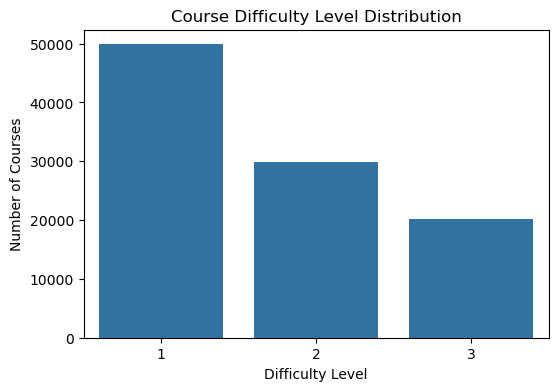

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="difficulty_level",
    data=df
)
plt.title("Course Difficulty Level Distribution")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Courses")
plt.show()

##### This shows how courses are distributed across difficulty levels.

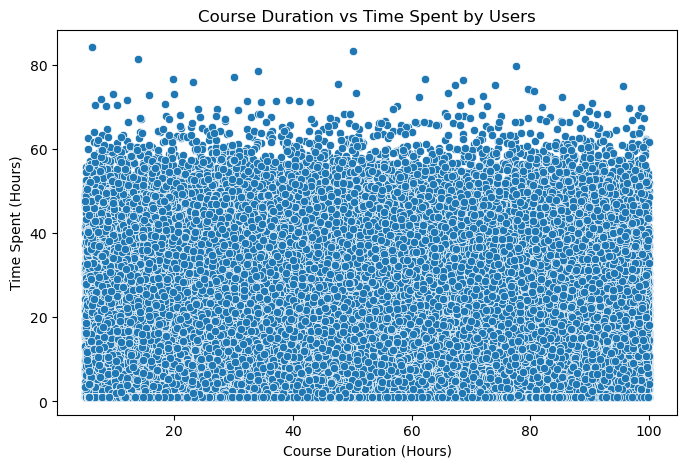

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="course_duration_hours",
    y="time_spent_hours",
    data=df
)
plt.title("Course Duration vs Time Spent by Users")
plt.xlabel("Course Duration (Hours)")
plt.ylabel("Time Spent (Hours)")
plt.show()


##### Time spent generally increases with course duration, which validates data consistency.

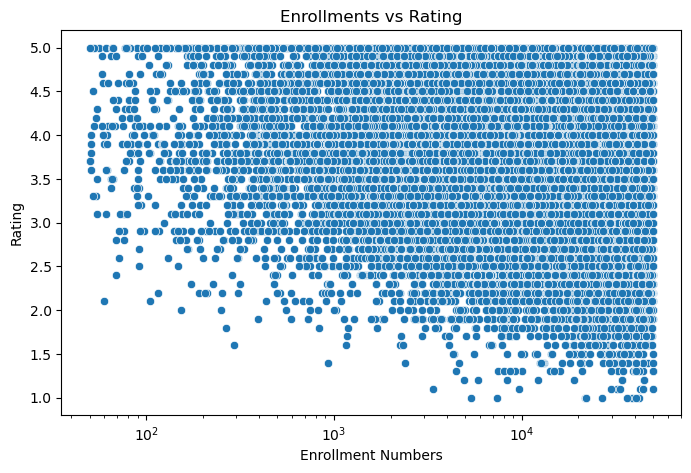

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="enrollment_numbers",
    y="rating",
    data=df
)
plt.title("Enrollments vs Rating")
plt.xlabel("Enrollment Numbers")
plt.ylabel("Rating")
plt.xscale("log")
plt.show()


##### Highly enrolled courses generally have good ratings, validating the popularity feature

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
data = df.copy()
data.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,1,1,5.0,21600,317.50,0.797,1,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,1,1,4.3,15379,40.99,0.770,1,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,1,1,3.9,6431,380.81,0.772,1,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,1,1,3.1,48245,342.80,0.969,0,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,1,1,2.8,34556,381.01,0.555,1,22.01,5


In [26]:
num_cols = [
    'course_duration_hours',
    'rating',
    'enrollment_numbers',
    'course_price',
    'feedback_score'
]


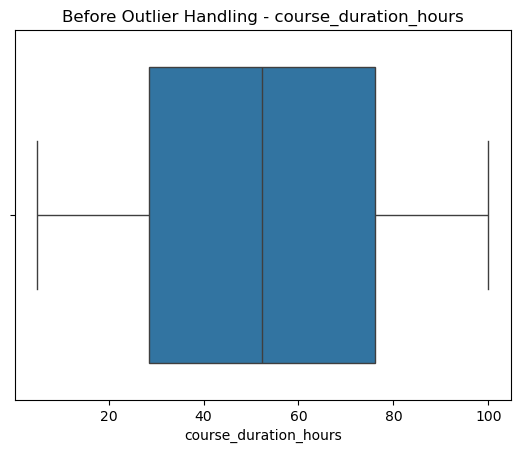

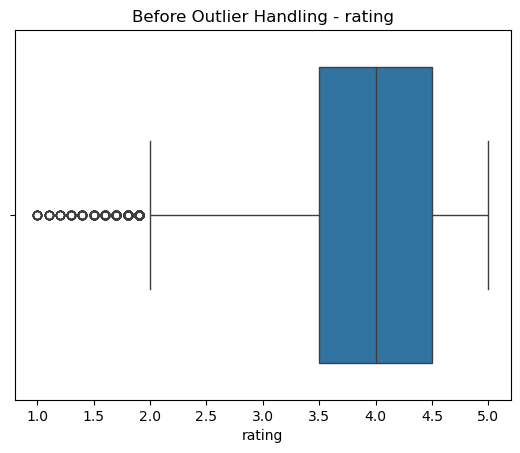

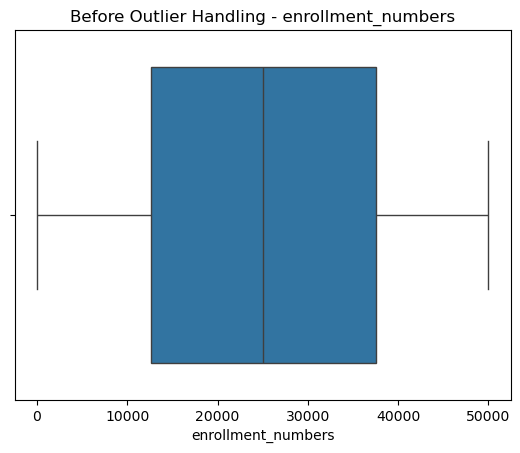

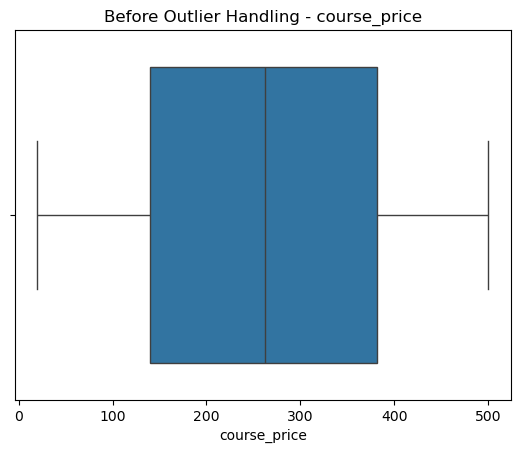

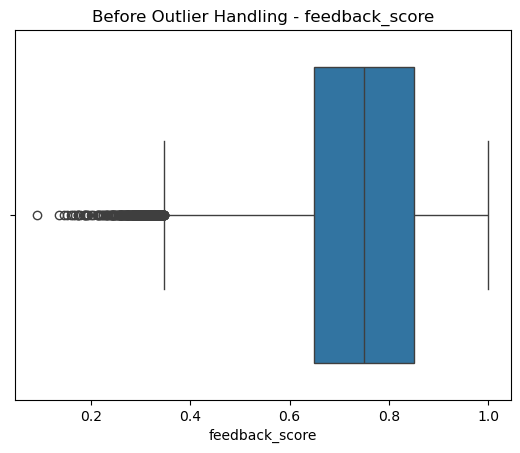

In [27]:
# Before outlier handling
for col in num_cols:
    sns.boxplot(x=data[col])
    plt.title(f"Before Outlier Handling - {col}")
    plt.show()

In [28]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[
        (data[col] >= Q1 - 1.5 * IQR) &
        (data[col] <= Q3 + 1.5 * IQR)
    ]

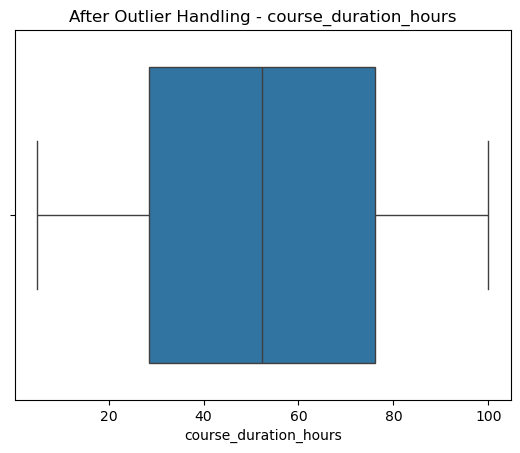

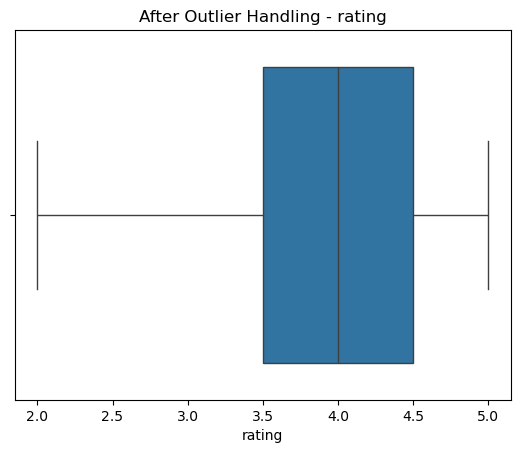

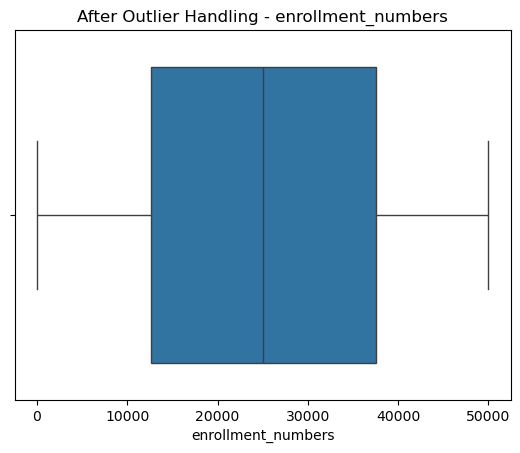

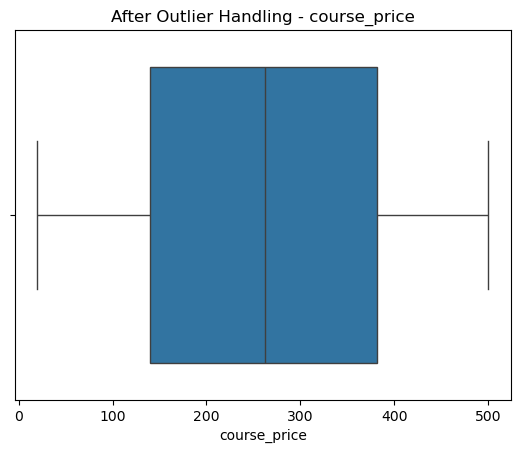

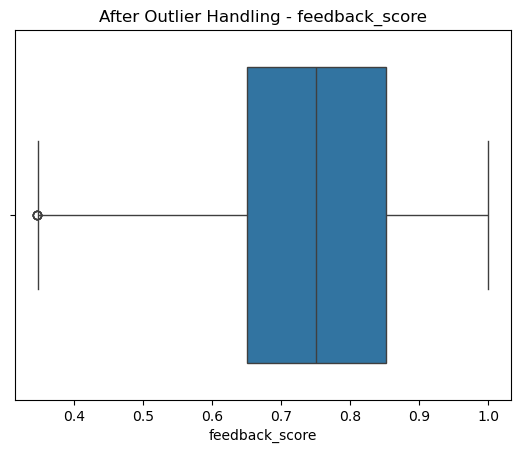

In [29]:
# After outlier handling
for col in num_cols:
    sns.boxplot(x=data[col])
    plt.title(f"After Outlier Handling - {col}")
    plt.show()

In [30]:
data.reset_index(drop=True, inplace=True)
data['row_pos'] = np.arange(len(data))

print("After outlier handling:", data.shape)


After outlier handling: (99095, 15)


#### Scaling 

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
scaler = MinMaxScaler()

In [33]:
scale_cols = [
    'course_duration_hours',
    'enrollment_numbers',
    'course_price',
    'feedback_score',
    'course_popularity',
    'instructor_popularity'
]

In [34]:
scale_cols = [col for col in scale_cols if col in data.columns]
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [35]:
data[scale_cols]

,course_duration_hours,enrollment_numbers,course_price,feedback_score
0,0.358947,0.431440,0.619792,0.689127
1,0.329474,0.306893,0.043729,0.647779
2,0.088421,0.127750,0.751688,0.650842
3,0.561053,0.964884,0.672500,0.952527
4,0.271579,0.690825,0.752104,0.318530
...,...,...,...,...
99090,0.129474,0.982022,0.969458,0.751914
99091,0.667368,0.701856,0.297500,0.880551
99092,0.724211,0.242167,0.008375,0.984686
99093,0.266316,0.197862,0.796333,0.433384


#### Model Building

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
ratings = data[['user_id', 'course_id', 'rating']].copy()

from sklearn.model_selection import train_test_split
train, test_df = train_test_split(
    ratings, test_size=0.2, random_state=42
)



In [38]:
global_mean = train['rating'].mean()

#### MODEL 1 — POPULARITY BASED

In [39]:
test_df['popularity_pred'] = global_mean

popularity_rmse = np.sqrt(
    mean_squared_error(test_df['rating'], test_df['popularity_pred'])
)


In [40]:
popularity_rmse

0.7146524853033178

#### MODEL 2 —  CONTENT BASED


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
global_mean = train['rating'].mean()

In [43]:
def content_predict(row):
    ratings = train[
        train['course_id'] == row['course_id']
    ]['rating']
    
    return ratings.mean() if not ratings.empty else global_mean

In [44]:
test_df['content_pred'] = test_df.apply(
    content_predict, axis=1
)


In [45]:
content_rmse = np.sqrt(
    mean_squared_error(
        test_df['rating'],
        test_df['content_pred']
    )
)

print("Content-Based RMSE:", content_rmse)


Content-Based RMSE: 0.7667054627708443


#### MODEL 3 — Collaborative Filtering

In [46]:
user_bias = train.groupby('user_id')['rating'].mean() - global_mean
item_bias = train.groupby('course_id')['rating'].mean() - global_mean

In [47]:
def cf_predict(row):
    bu = user_bias.get(row.user_id, 0)
    bi = item_bias.get(row.course_id, 0)
    return global_mean + bu + bi

test_df['cf_pred'] = test_df.apply(cf_predict, axis=1)

cf_rmse = np.sqrt(
    mean_squared_error(test_df['rating'], test_df['cf_pred'])
)

In [48]:
cf_rmse

0.9155313909475526

#### MODEL 4 — HYBIRD

In [49]:
def hybrid_predict(row):
    return 0.5 * cf_predict(row) + 0.5 * content_predict(row)

test_df['hybrid_pred'] = test_df.apply(hybrid_predict, axis=1)

hybrid_rmse = np.sqrt(
    mean_squared_error(test_df['rating'], test_df['hybrid_pred'])
)

In [50]:
hybrid_rmse

0.8048433195164656

#### Model Comparision

In [51]:
results = pd.DataFrame({
    'Model': [
        'Popularity',
        'Content-Based',
        'Collaborative Filtering',
        'Hybrid'
    ],
    'RMSE': [
        popularity_rmse,
        content_rmse,
        cf_rmse,
        hybrid_rmse
    ]
}).sort_values(by='RMSE')

print("\nMODEL COMPARISON")
print(results)


MODEL COMPARISON
                     Model      RMSE
0               Popularity  0.714652
1            Content-Based  0.766705
3                   Hybrid  0.804843
2  Collaborative Filtering  0.915531


#### Final result

In [52]:
def get_top_n(user_id, n=5):
    seen = train[train.user_id == user_id]['course_id']
    candidates = item_mean.index.difference(seen)

    scores = []
    for course in candidates:
        row = pd.Series({'user_id': user_id, 'course_id': course})
        scores.append((course, hybrid_predict(row)))

    return sorted(scores, key=lambda x: x[1], reverse=True)[:n]


In [53]:
def get_top_n(user_id, n=5):
    # SAFETY: recompute item_mean if it doesn't exist
    item_mean_local = train.groupby('course_id')['rating'].mean()

    seen = train[train.user_id == user_id]['course_id']
    candidates = item_mean_local.index.difference(seen)

    scores = []
    for course in candidates:
        row = pd.Series({'user_id': user_id, 'course_id': course})
        scores.append((course, hybrid_predict(row)))

    return sorted(scores, key=lambda x: x[1], reverse=True)[:n]

In [54]:
best_model = results.iloc[0]['Model']
print("\nBest Model:", best_model)


Best Model: Popularity


In [55]:
course_lookup = (
    data[['course_id', 'course_name', 'instructor', 'rating']]
    .drop_duplicates(subset='course_id')
)

In [56]:
def get_top_n_readable(user_id, n=5):
    recs = get_top_n(user_id, n)

    rec_df = pd.DataFrame(
        recs, columns=['course_id', 'recommendation_score']
    )

    result = rec_df.merge(
        course_lookup,
        on='course_id',
        how='left'
    )

    return result.sort_values(
        by='recommendation_score',
        ascending=False
    )

In [57]:
print("\nTop Recommendations for User 15796")
get_top_n_readable(15796, 5)


Top Recommendations for User 15796


,course_id,recommendation_score,course_name,instructor,rating
0,4424,5.164571,Data Visualization with Tableau,Michael Brown,5.0
1,7188,5.164571,Advanced Machine Learning,David Wilson,4.7
2,1735,5.114571,Cloud Computing Essentials,Jessica Martinez,3.2
3,6646,5.114571,Mobile App Development with Swift,Jessica Martinez,5.0
4,3287,5.064571,Project Management Fundamentals,William Thomas,4.4


### Checking columns for generating pickle files

In [6]:
import pandas as pd

print("INVESTIGATING YOUR DATASET...")
df = pd.read_excel('online_course_recommendation.xlsx')

print("\n" + "="*50)
print("EXACT COLUMN NAMES:")
print(df.columns.tolist())
print("\n" + "="*50)
print("SHAPE:", df.shape)
print("\n" + "="*50)
print("FIRST 3 ROWS:")
print(df.head(3))
print("\n" + "="*50)
print("SAMPLE VALUES:")
for col in df.columns[:5]:
    print(f"{col}: {df[col].dtype} | Sample: {df[col].iloc[0]}")


INVESTIGATING YOUR DATASET...

EXACT COLUMN NAMES:
['user_id', 'course_id', 'course_name', 'instructor', 'course_duration_hours', 'certification_offered', 'difficulty_level', 'rating', 'enrollment_numbers', 'course_price', 'feedback_score', 'study_material_available', 'time_spent_hours', 'previous_courses_taken']

SHAPE: (100000, 14)

FIRST 3 ROWS:
   user_id  course_id                       course_name       instructor  \
0    15796       9366              Python for Beginners      Emma Harris   
1      861       1928   Cybersecurity for Professionals  Alexander Young   
2    38159       9541  DevOps and Continuous Deployment   Dr. Mia Walker   

   course_duration_hours certification_offered difficulty_level  rating  \
0                   39.1                   Yes         Beginner     5.0   
1                   36.3                   Yes         Beginner     4.3   
2                   13.4                   Yes         Beginner     3.9   

   enrollment_numbers  course_price  feedba

### Pickle file

In [19]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
df = pd.read_excel('online_course_recommendation.xlsx')

# Preprocess
train_df = df[['user_id', 'course_id', 'rating']].copy()
train_df.columns = ['userid', 'courseid', 'rating']

# Calculate Biases
global_mean = train_df['rating'].mean()
user_bias = train_df.groupby('userid')['rating'].mean().subtract(global_mean).to_dict()
item_bias = train_df.groupby('courseid')['rating'].mean().subtract(global_mean).to_dict()

# TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
course_features = df['course_name'].astype(str) + ' ' + df['instructor'].astype(str)
tfidf.fit(course_features)

# Save ALL files (Ensure wb mode is used)
df.to_pickle('full_data.pkl')
train_df.to_pickle('train_data.pkl')
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('biases.pkl', 'wb') as f:
    pickle.dump({'global_mean': global_mean, 'user_bias': user_bias, 'item_bias': item_bias}, f)

print("All files saved successfully!")

All files saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load the original dataset
df = pd.read_excel('online_course_recommendation.xlsx')

# 2. Deduplicate metadata (Ensures each ID has only ONE name/instructor)
# This prevents courses appearing twice in the results
metadata = df[['course_id', 'course_name', 'instructor', 'rating']].drop_duplicates(subset=['course_id'])

# 3. Prepare Training Data
train_df = df[['user_id', 'course_id', 'rating']].copy()
train_df.columns = ['userid', 'courseid', 'rating']

# 4. Calculate Biases (Collaborative Filtering Component)
global_mean = train_df['rating'].mean()
user_bias = train_df.groupby('userid')['rating'].mean().subtract(global_mean).to_dict()
item_bias = train_df.groupby('courseid')['rating'].mean().subtract(global_mean).to_dict()

# 5. Fit TF-IDF on unique course descriptions
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
# We use course_name + instructor for the similarity search
metadata['content'] = metadata['course_name'].astype(str) + ' ' + metadata['instructor'].astype(str)
tfidf.fit(metadata['content'])

# 6. Save all assets (Use 'wb' mode to prevent "Ran out of input" error)
metadata.to_pickle('full_data.pkl')
train_df.to_pickle('train_data.pkl')
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump({
    'global_mean': global_mean, 
    'user_bias': user_bias, 
    'item_bias': item_bias
}, open('biases.pkl', 'wb'))

print("SUCCESS: All 4 files created and deduplicated!")